In [1]:
%cd /Users/gwg/dmcm
%matplotlib inline

/Users/gwg/dmcm


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

plt.style.use('seaborn')

In [36]:
# Muscle_Skeletal	10	chr10_118809984_A_G_b38	row17
# Muscle_Skeletal	11	chr11_123015616_G_C_b38	row8
# Muscle_Skeletal	4	chr4_109018906_G_A_b38	row19
# Muscle_Skeletal	6	chr6_150866897_G_A_b38	row5
# Muscle_Skeletal	7	chr7_25560021_T_C_b38	row5

tissue  = 'Muscle_Skeletal'
chromo  = 6
snp_nam = 'chr6_150866897_G_A_b38'
cmp_row = 5
# I've seen cmp_rows of 30 but the indices go up to 29.
cmp_row -= 1

fname = 'analysis/genotypes/%s_chr%s.cleaned.tsv' % (tissue, chromo)
genotype_df = pd.read_csv(fname, sep='\t')
print(genotype_df.shape)

fname = 'analysis/expression_matrices/expression_matrix_%s_latent_dim-10.txt' % tissue
expression_df = pd.read_csv(fname, sep='\t')
print(expression_df.shape)

(309014, 827)
(30, 344)


267 66 10


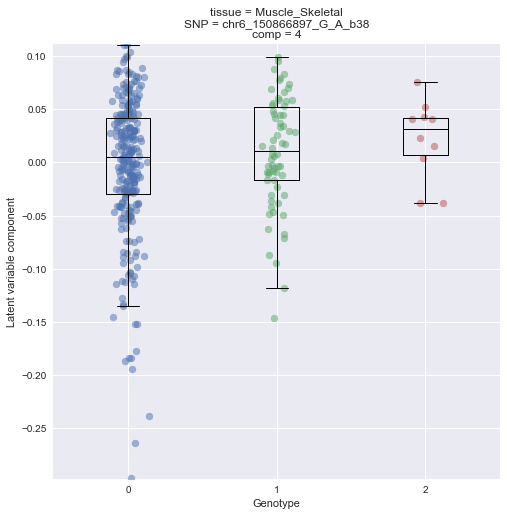

In [54]:
def rand_jitter(arr):
    # Credit: https://stackoverflow.com/a/21276920/1830334
    stdev = .1*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

snps  = iter(genotype_df[genotype_df['constVarID'] == snp_nam].items())
next(snps)  # Skip first row
zeros = []
ones  = []
twos  = []

for row in snps:
    gtex_name = row[0]
    allele = row[1].values[0]
    
    if gtex_name not in expression_df.columns.values:
        continue
    comp_val = expression_df[gtex_name][cmp_row]
    if allele == 0:
        zeros.append(comp_val)
    elif allele == 1:
        ones.append(comp_val)
    elif allele == 2:
        twos.append(comp_val)
    else:
        raise RuntimeError('Unknown allele value.')

print(len(zeros), len(ones), len(twos))
all_ = np.array(zeros + ones + twos)
        
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.set_ylim([all_.min() - 0.001, all_.max() + 0.001])
ax.set_xticks([0, 1, 2])
ax.set_xlabel('Genotype')
ax.set_ylabel('Latent variable component')
ax.set_title('tissue = %s\nSNP = %s\ncomp = %s' % 
             (tissue, snp_nam, cmp_row))

xzeros = np.random.normal(0, 0.05, len(zeros)) + 1
xones  = np.random.normal(1, 0.05, len(ones)) + 1
xtwos  = np.random.normal(2, 0.05, len(twos)) + 1

bp = ax.boxplot([zeros, ones, twos],
                labels=[0, 1, 2],
                medianprops = dict(color='k'))

ax.scatter(xzeros, zeros, alpha=0.5)
ax.scatter(xones, ones, alpha=0.5)
ax.scatter(xtwos, twos, alpha=0.5)